In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv', header=None)

In [3]:
df

0         1
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]

### Let's see how the data looks


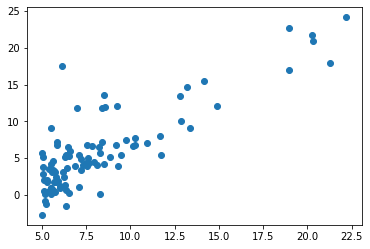

In [4]:
plt.scatter(df[0],df[1])

### We are told to build multi-dimensional gradient descent but our data is 2 dimensional. Increasing the dimension of our data using Polynomial Features

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)

### Extracting the features and target 

In [6]:
X=df[0].values
y=df[1].values

### Reshaping and increasing our dimensional space

In [7]:
X=X.reshape((X.shape[0],1))
X=poly.fit_transform(X)

### Normalizing the features along the columns as un-normalized features resulted in gradient oscillations

In [8]:
X=X/X.max()

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=100)

### Importing and using our self-made LinearRegression Model using Multi-dimensional GD
#### `To see the Linear Regression class, see linear_regression.py in the  same module`

In [10]:
from linear_regression import LinearRegressionMGD

In [11]:
model=LinearRegressionMGD()

### Training ( Applying SGD using mini batches )

In [12]:
%time model.fit(X_train,y_train, lr=1e-2, batch_size=10, epochs=3000, threshold=1e-8, show_epochs=500)

 Epoch: 500 Cost: 766.307669297959 
 Epoch: 1000 Cost: 724.7047039163648 
 Epoch: 1500 Cost: 723.0850976699878 
 Epoch: 2000 Cost: 723.023117265214 
 Epoch: 2500 Cost: 723.0943292901276 
 Epoch: 3000 Cost: 723.1474535122942 
Wall time: 4.71 s


### `Training Took 4.71 secs`

### Let's see how our loss decreased

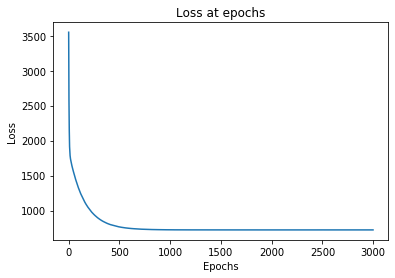

In [13]:
plt.plot(range(len(model.costs)), model.costs)
plt.title('Loss at epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### The r2_score of our predictions

In [14]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.5855580463972545